### 1. t-test

Вспомним z-test и задачу, которую мы рассмотрели при рассмотрении z-test-а

1. У нас была выборка. По выборке нужно было проверить гипотезу, что среднее ГС = 80 </br></br>
Нулевая гипотеза $H_0$: среднее генеральной совокупности = 80</br>
Альтернативная гипотеза $H_1$: среднее генеральной совокупности != 80</br></br>
3. У нас была известна $\sigma$ - стандартное отклонение ГС
4. С помощью ЦПТ мы расчитали стандартную ошибку среднего (стандартное отклонение выборочного среднего)<br/><br/>
$ SE  = \frac{\sigma}{\sqrt{n}} $ <br/><br/>
5. А дальше сделали z-преобразование (стандартизацию)</br></br>
$ z  = \frac{\bar{x} - \mu}{SE} $ <br/> <br/>
6. Далее мы сравнили полученную z-статистику с критическими значениями и отклонили/приняли нулевую гипотезу

На практике мы не знаем не только среднее ГС, но и стандартное отклонение ГС тоже. Вместо стандартного отклонения ГС можно использовать стандартное отклонение расчитанное по выборке. Стандартное отклонение по выборке обозначается $s_x$. 

$s_x$ - это оценка $\sigma$.

Вместо стандартной ошибки среднего уже расчитывается **оценка стандартной ошибки среднего:** </br>
ESE (estimate standart error) = $\frac{s_x}{\sqrt{n}} $ <br/>

Как и в случае с средним, с увеличениием размера выборки $s_x$ сходится к $\sigma$. Т. е. чем больше выборка тем точнее будет оценка стандартного отклонения ГС

Немного теории:</br>
1. Предположим мы сформировали множество выборок и расчитали среднее для каждой выборки. Мы получили распределение выборочных средних.</br>
2. Далее расчитаем оценку стандартной ошибки среднего $ESE$</br>
3. Страндартизируем каждое значение из распределения выборочного среднего по формуле: $\frac{\bar{x} - \mu}{ESE}$ и тогда мы уже получим не z-распределение, а t-распределение.


У t-распределения, в отличие от z-распределения, есть параметр **степень свободы**

Степень свободы (Degree of Freedom, df) - это количество переменных, которые оставляются свободными для варьирования после того, как структура выборки была определена.

$ df = n-1 $

чем больше степеней свободы тем t-распределение стремится к z-распределению

In [74]:
from scipy import stats as sts
from scipy.stats import t
import numpy as np
from matplotlib import pyplot as plt

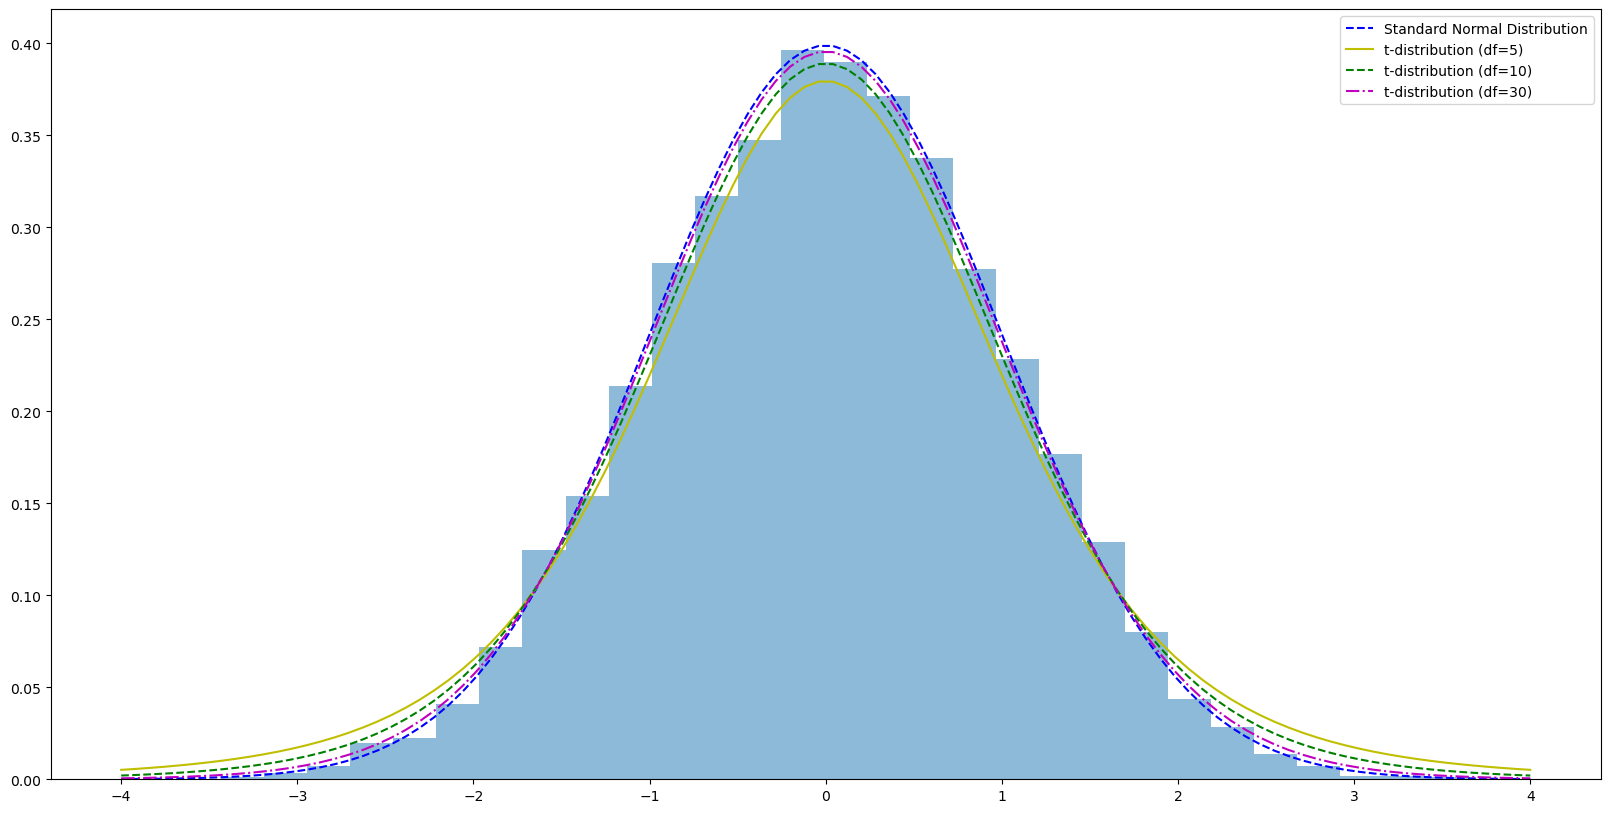

In [75]:
plt.figure(figsize=(20,10))

# Генерирование выборки
norm_rv = sts.norm(loc=0, scale=1) #задаем параметры распределения
data = norm_rv.rvs(size=10000)

# Построение гистограммы
plt.hist(data, bins=30, density=True, alpha=0.5, color='C0')

# Стандартное нормальное распределение (z-распределение)
x = np.linspace(-4, 4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, 'b--', label='Standard Normal Distribution') 

# t-распределение с разными степенями свободы
x = np.linspace(-4, 4, 100)
plt.plot(x, t.pdf(x, df=5), 'y-', label='t-distribution (df=5)')
plt.plot(x, t.pdf(x, df=10), 'g--', label='t-distribution (df=10)')
plt.plot(x, t.pdf(x, df=30), 'm-.', label='t-distribution (df=30)')

plt.legend()
plt.show()

Выводы из графика:
1. чем больше степеней свободы, тем t-распределение больше стремится к z-распределению.
2. при df>=30 t-распределение становится идентичным на z-распределению
3. При df< 30 t-распределение имеет более тяжелые хвосты. В хвостах распологается больше вероятностной массы
4. При достаточной выборке (где n > 30) для проверки гипотез можно использовать как t-статистику, так и z-статистику

Изменим условие задачи из предыдущего урока, посвященного z-test

#### Задача:
Дана выборка случайным образом взятая из ГС.  
Есть предположение о том, что среднее генеральной совокупности = 80. <br>
Необходимо проверить  по выборке, что среднее ГС = 80.<br>

При этом в отличие от предыдущей задачи **мы не знаем стандартное отклонение ГС** (условия задачи больше приближены к реальности)

Формулируем нулевую и альтернативную гипотезы:</br>
Нулевая гипотеза $H_0$: среднее генеральной совокупности = 80</br>
Альтернативная гипотеза $H_1$: среднее генеральной совокупности != 80</br>
alpha = 0.05

In [112]:
#создадим нормальное распределение. Пусть это распределение будет являться генеральной совокупностью
np.random.seed(0)
mu = 80
sigma = 15
norm_rv = sts.norm(loc=mu, scale=sigma) #задаем параметры распределения
X = norm_rv.rvs(size=100000)

#округлим каждое значение до целого числа
X= [int(np.round(i,0)) for i in X]

In [113]:
#среднее генеральной совокупности ~ 80
np.mean(X)

80.02364

In [114]:
#стандартное отклонение ~ 15
np.std(X)

14.962424307257162

Предположим что у нас есть выборка из генеральной совокупности

In [115]:
sample = np.random.choice(X, size=1000, replace=False)

In [116]:
#среднее выборки
np.mean(sample)

79.631

In [117]:
#стандартное отклонение по выборке
np.std(sample)

14.35774491346047

In [118]:
ESE = np.std(sample)/(len(sample)**0.5)
print(ESE)

0.45403175990232225


Шаг 2: Расчитаем  t-статистику для нашей выборки

In [119]:
t_stats = (np.mean(sample) - 80)/ESE
print(t_stats)

-0.8127184760805815


Шаг 3: расчитаем кол-во степеней свободы

In [120]:
df = len(sample)-1
print(df)

999


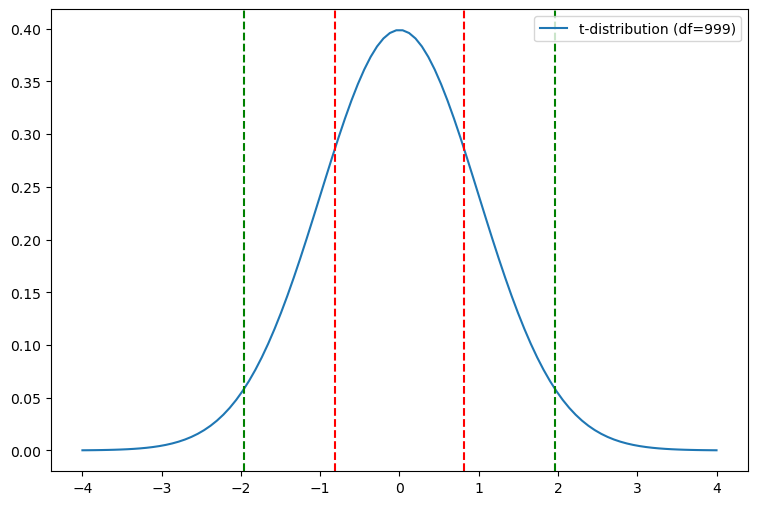

In [121]:
plt.figure(figsize=(9,6))
plt.plot(x, t.pdf(x, df=999), label='t-distribution (df=999)')

plt.axvline(x=1.96, color='g', linestyle='--')
plt.axvline(x=-1.96, color='g', linestyle='--')

plt.axvline(x=t_stats, color='r', linestyle='--')
plt.axvline(x=-t_stats, color='r', linestyle='--')

plt.legend()
plt.show()

Шаг 4. Смотрим в таблицу зависимости степеней свободы и т-статистики https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf

В z-распределении все просто, мы знаем критические значения: -1.96 и 1.96. Вероятность между критическими значениями = 95%
В отличие от z-распределения, в t-распределении есть еще дополнительный параметр - степени свободы. И нам нужно с учетом степеней свободы подобрать критичекие значения, подобрать 95%-ый доверительный интервал.

Если выборка большая, то t-распределение будет сходиться к z-распределению, а доверительный интервал будет примерно таким же

In [122]:
print(t.cdf(1.96, df=999))
print(t.cdf(-1.96, df=999))
print(t.cdf(1.96, df=999)-t.cdf(-1.96, df=999))

0.9748632686330949
0.02513673136690503
0.9497265372661898


Критические значения мы можем заменить на получившуюся t-статистику и -(t-статистику) и посчитать вероятность в получившемся интервале и вне интервала

In [124]:
print(t.cdf(0.8127184760805815, df=999))
print(t.cdf(-0.8127184760805815, df=999))
print(t.cdf(0.8127184760805815, df=999)-t.cdf(-0.8127184760805815, df=999))
print(1-(t.cdf(0.8127184760805815, df=999)-t.cdf(-0.8127184760805815, df=999)))

0.7917134415042855
0.2082865584957146
0.5834268830085709
0.41657311699142907


### 2. P-value

До текущего момента мы сравнивали полученную z-статистику и t-статистику с областью критических значений. Если статистика попадала в область критических значений, это значило что вероятность получение такой статистики меньше 5%

Но статистики придумали **p-value**. **p-value** - это вероятность получить такие или более значимые различия статистики

In [125]:
# Выполнение t-теста
t_statistic, p_value = sts.ttest_1samp(sample, 80)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -0.8123120152019049
p-value: 0.41680613931925203


Если p-value меньше $\alpha$, тогда мы отвергаем нулевую гипотезу.

В статистические пакеты уже заложен расчет p-value, не нужно смотреть на таблички